In [21]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# SFOAE data loading
mat_SFOAE = scipy.io.loadmat(
    'data/SFOAE/sfoae20dBg130TM45R19rs2.mat')

freq_SFOAE = mat_SFOAE['Fvect'].flatten()  # frequency axis
SFOAE = mat_SFOAE['oaeNum20'].flatten()  # SFOAE wave
CRcomp = mat_SFOAE['CRc20'].flatten()  # CR component
NLcomp = mat_SFOAE['Yunl20'].flatten()  # NL component


phase_unwrap_SFOAE = np.unwrap(np.angle(SFOAE))
# difference between neighbour samples on the frequency axis (evenly spaced)
# step_size_SFOAE = freq_SFOAE[1] - freq_SFOAE[0]
# phase_grad_SFOAE = np.gradient(phase_unwrap_SFOAE, step_size_SFOAE)
phase_grad_SFOAE = np.gradient(phase_unwrap_SFOAE, freq_SFOAE)
group_delay_SFOAE = -phase_grad_SFOAE/(2*np.pi)

time_SFOAE = np.fft.ifft(SFOAE)
sample_freq = 1000
time_axis = 1000*np.arange(len(time_SFOAE))/sample_freq # 1000 --> ms




['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
Using wavelet:  coif12


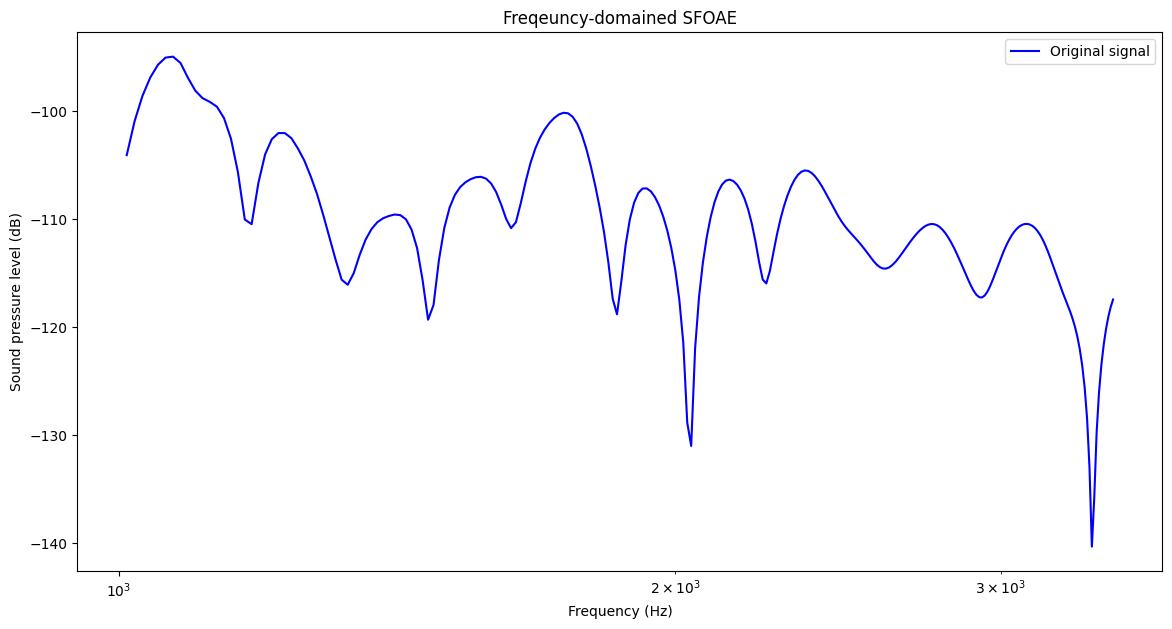

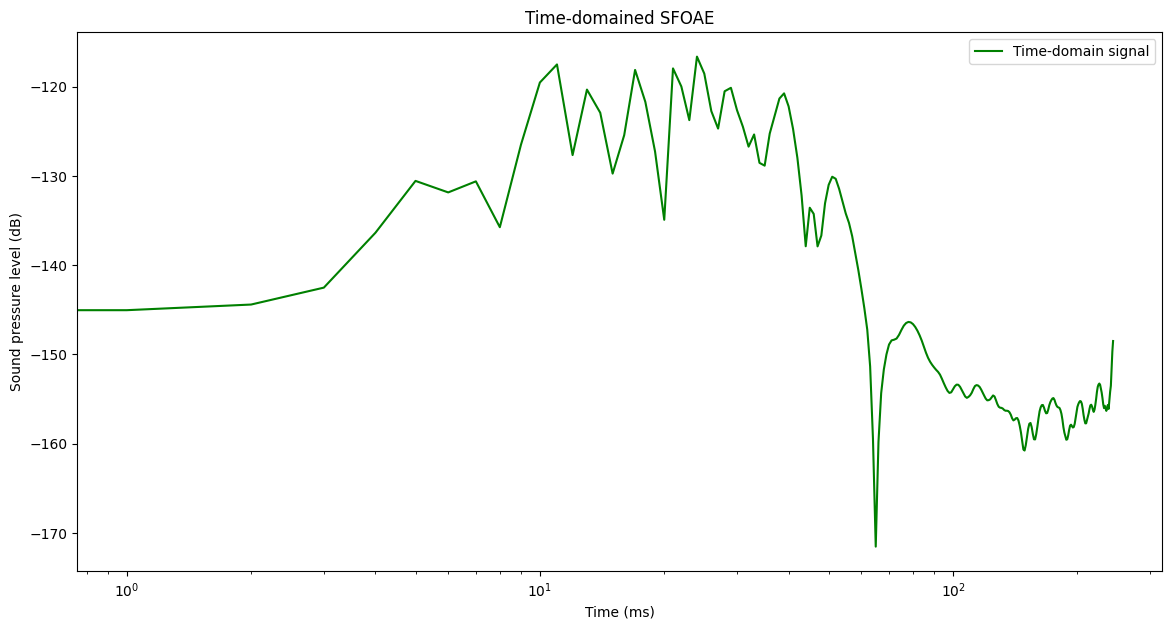

In [22]:
all_wavelets = pywt.wavelist(kind='discrete')
print(all_wavelets)

# Define the wavelet to use
rand_wavelet_idx = np.random.randint(np.size(all_wavelets))
wavelet = all_wavelets[rand_wavelet_idx]
print("Using wavelet: ", wavelet)

# Apply the wavelet transform
coeffs = pywt.wavedec(SFOAE, wavelet)

# Reconstruct the signal
reconstructed_SFOAE = pywt.waverec(coeffs, wavelet)

phase_unwrap_wavelet = np.unwrap(np.angle(reconstructed_SFOAE))
# difference between neighbour samples on the frequency axis (evenly spaced)
step_size_wavelet = freq_SFOAE[1] - freq_SFOAE[0]
phase_grad_wavelet = np.gradient(phase_unwrap_wavelet, step_size_wavelet)
# phase_grad_wavelet = np.gradient(phase_unwrap_wavelet, freq_SFOAE)
group_delay_wavelet = -phase_grad_wavelet/(2*np.pi)

fig, ax = plt.subplots(figsize=(14, 7))
# Plot the original and reconstructed signals
ax.plot(freq_SFOAE, np.real(20*np.log10(SFOAE)), 'b', label='Original signal',)
# ax.plot(freq_SFOAE, np.real(20*np.log10(reconstructed_SFOAE))[:-1],
#          'r', label='Reconstructed signal')
ax.set_xscale('log')
#ax.set_xlim([1000, 3.5e3])
#ax.set_ylim([0, 20])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Sound pressure level (dB)')
ax.legend()
ax.set_title('Freqeuncy-domained SFOAE')
plt.show()

fig, ax = plt.subplots(figsize=(14, 7))
# Plot the original and reconstructed signals
ax.plot(time_axis, np.real(20*np.log10(time_SFOAE)),
        'g', label='Time-domain signal',)
# ax.plot(freq_SFOAE, np.real(20*np.log10(reconstructed_SFOAE))[:-1],
#          'r', label='Reconstructed signal')
ax.set_xscale('log')
# ax.set_xlim([1000, 3.5e3])
# ax.set_ylim([0, 20])s
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Sound pressure level (dB)')
ax.legend()
ax.set_title('Time-domained SFOAE')
plt.show()


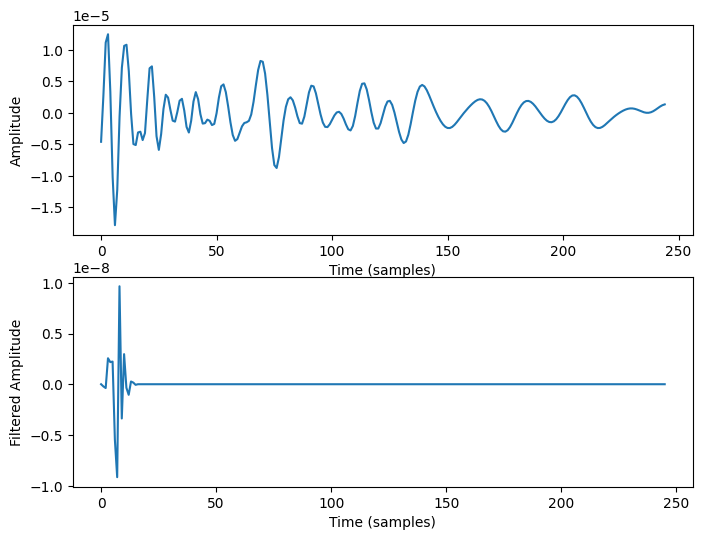

In [26]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Load the SFOAE signal
sfoae = SFOAE

# Define the wavelet type and decomposition level
wavelet = 'db4'
level = 5

# Decompose the SFOAE signal into wavelet coefficients
coeffs = pywt.wavedec(sfoae, wavelet, level=level)

# Calculate the standard deviation of each wavelet coefficient
stds = [np.std(c) for c in coeffs]

# Compute the threshold value for each wavelet coefficient
threshold_factor = 3
thresholds = [std * threshold_factor for std in stds]

# Set all wavelet coefficients below their threshold to zero
filtered_coeffs = [pywt.threshold(c, t, 'soft')
                   for c, t in zip(coeffs, thresholds)]

# Reconstruct the filtered SFOAE signal from the modified wavelet coefficients
filtered_sfoae = pywt.waverec(filtered_coeffs, wavelet)

# Apply a Hann window to reduce edge effects
window = np.hanning(len(filtered_sfoae))
filtered_sfoae = filtered_sfoae * window

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].plot(sfoae)
axs[0].set_xlabel('Time (samples)')
axs[0].set_ylabel('Amplitude')
axs[1].plot(filtered_sfoae)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Filtered Amplitude')
plt.show()
